# **KPMG VIRTUAL INTERNSHIP PROJECT**

## **Task 1: Data Quality Assessment :**
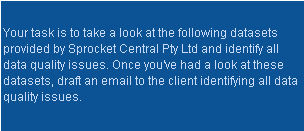

**The client provided KPMG with 3 datasets:**

1.   Customer Demographic
2.   Customer Addresses

3.   Transactions data in the past 3 months



In [ ]:
import pandas as pd
import numpy as np

### **Reading Excel file**

In [ ]:
df = pd.ExcelFile("KPMG_VI_New_raw_data_update_final_.xlsx")

### **Reading files separately inside Excel file**

In [ ]:
transaction = pd.read_excel(df, "Transactions")

new_customer = pd.read_excel(df,"NewCustomerList")

customer_demographic = pd.read_excel(df,"CustomerDemographic")

customer_address = pd.read_excel(df,"CustomerAddress")

<ipython-input-81-450bac97d697>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customer = pd.read_excel(df,"NewCustomerList")
<ipython-input-81-450bac97d697>:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customer_demographic = pd.read_excel(df,"CustomerDemographic")


# **Exploring Transactions dataset**

In [ ]:
transaction.shape

(20000, 13)

In [ ]:
transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [ ]:
transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

 **There are 7 columns which contain null values , so it can be filled basis on the further analysis**

In [ ]:
transaction.duplicated().sum()

0

 **There are no duplicate value ,therefore all values are unique**

## **Exploring columns**

In [ ]:
transaction.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [ ]:
cols = ["order_status" , "brand" , "product_line" , "product_class" , "product_size"]

for i in cols:
  status = transaction[i].value_counts()
  print(status)
  print("___________________________________________________________")


Approved     19821
Cancelled      179
Name: order_status, dtype: int64
___________________________________________________________
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64
___________________________________________________________
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64
___________________________________________________________
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64
___________________________________________________________
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64
___________________________________________________________


**by this i can conclude that  Solex brand most popular**

In [ ]:
transaction["transaction_id"].value_counts()

1        1
13331    1
13338    1
13337    1
13336    1
        ..
6667     1
6666     1
6665     1
6664     1
20000    1
Name: transaction_id, Length: 20000, dtype: int64

In [ ]:
transaction["product_id"].value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [ ]:
transaction["customer_id"].value_counts()

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64

**there are total 3494 customer id**

In [ ]:
transaction["transaction_date"].value_counts()

2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

In [ ]:
transaction["product_first_sold_date"].value_counts()

33879.0    234
41064.0    229
37823.0    227
39880.0    222
38216.0    220
          ... 
41848.0    169
42404.0    168
41922.0    166
37659.0    163
34586.0    162
Name: product_first_sold_date, Length: 100, dtype: int64

**In product sold date has wrong data inputed , instead of sold date there is price**



# **Exploring NewCustomerlist Dataset**

In [ ]:
new_customer.shape

(1000, 23)

In [ ]:
new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [ ]:
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
new_customer.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.54,0.675,0.84375,0.717187,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.81,0.810,1.01250,0.860625,1,1,1.71875


**therefore there is unwanted unknown column**

In [ ]:
# using only required columns
new_customer = new_customer.iloc[:,0:16]
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64



**There are null values in 4 columns , so it can be drop or fill on the basis of further analysis**




In [ ]:
new_customer.duplicated().sum()

0



**There are no duplicate value , it means there are unique values**






In [ ]:
# Exploring columns
new_customer.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
dtype: object

In [ ]:
cols = ["gender" , "job_title" ,"job_industry_category","wealth_segment","deceased_indicator","owns_car", "country"]

for i in cols:
  a = new_customer[i].value_counts()
  print(a)
  print("------------------------------------------------")

Female    513
Male      470
U          17
Name: gender, dtype: int64
------------------------------------------------
Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: job_title, Length: 184, dtype: int64
------------------------------------------------
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64
------------------------------------------------
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64
--------------

### **There are 17 unspecified gender**

In [ ]:
new_customer["past_3_years_bike_related_purchases"].value_counts()

60    20
59    18
42    17
70    17
11    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [ ]:
print(new_customer["DOB"].value_counts())
print(new_customer["DOB"].min())

1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64
1938-06-08 00:00:00


# **Exploring Customer Demographic**

In [ ]:
customer_demographic.shape

(4000, 13)

In [ ]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [ ]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

`There are null value in 6 columns`

In [ ]:
customer_demographic.duplicated().sum()

0

**There are all unique values**

In [ ]:
# Exploring columns

col = ["customer_id",
"first_name",
"last_name",
"gender",
"past_3_years_bike_related_purchases",
"DOB",
"job_title",
"job_industry_category",
"wealth_segment",
"deceased_indicator",
"default",
"owns_car",
"tenure"]

for i in col:
  a = customer_demographic[i].value_counts()
  print(a)
  print("-----------------------------------------------------------\n")

1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: customer_id, Length: 4000, dtype: int64
-----------------------------------------------------------

Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64
-----------------------------------------------------------

Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64
-----------------------------------------------------------

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64
-----------------------------------------------------------

16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85 

In [ ]:
customer_demographic["gender"].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

`in gender some title are not properly specified`

In [ ]:
# renaming the title in gender

customer_demographic["gender"] = customer_demographic["gender"].replace("M" ,"Male").replace("F","Female").replace("Femal","Female")
customer_demographic["gender"].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [ ]:
customer_demographic["default"].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

### **This values are inconsistent , it means this columns ie unneccesary so dropping it**

In [ ]:
customer_demographic = customer_demographic.drop(columns = "default" , axis = 1)


In [ ]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

# **Exploring Customer Address**

In [ ]:
customer_address.shape

(3999, 6)

In [ ]:
customer_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [ ]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
customer_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

**There is no null value presen**t

In [ ]:
customer_address.duplicated().sum()

0

**There is no duplicate value**

In [ ]:
customer_address["customer_id"].value_counts()

1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64

In [ ]:
customer_address["address"].value_counts().reset_index()

,index,address
0,3 Mariners Cove Terrace,2
1,3 Talisman Place,2
2,64 Macpherson Junction,2
3,359 Briar Crest Road,1
4,4543 Service Terrace,1
...,...,...
3991,5063 Shopko Pass,1
3992,09 Hagan Pass,1
3993,87897 Lighthouse Bay Pass,1
3994,294 Lawn Junction,1


In [ ]:
customer_address["postcode"].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

In [ ]:
customer_address["state"].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
customer_address["country"].value_counts()

Australia    3999
Name: country, dtype: int64

In [ ]:
customer_address["property_valuation"].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

# **In this all Columns are proper**